# Assignment 11 Quantum Scattering

based on https://www.compadre.org/picup/events/VirtualConference2020/abstracts/files/Quantum-scattering-wang.html#Jay-Wang-and-Owen-Tower,-UMass-Dartmouth,-www.faculty.umassd.edu/j.wang/ by Jay Wang 

This Assignment should take you approximately 120 minutes to complete.

After completing this assignment, you will be able to...
* Describe the process of quantum scattering.
* Identify quantities of interest in quantum scattering experiments.
* Describe Numerov's method for solving differential equations.
* Describe the use of the Yukawa potential energy to model a screened electric charge.
* Apply Numerov's method to determine a scattering wave function.
* Graph the wave function, phase shift, and cross section of a scattering problem.
* Interpret these results to describe the effect of quantum scattering.

Dr. Lane welcomes your questions about this assignment. Please send or bring a copy of your work-in-progress with your questions.

## Theory

All the quantum mechanics problems we studied in Assignments 6-10 involved solving for **bound states**, in which $\psi$ always exhibits a sharp decay away from the center of the potential energy. In a **scattering state**, the particle's energy is higher and $\psi$ doesn't have to exhibit this decay. Bound states and scattering states exhibit a few other notable differences:
* Bound states and scattering states are separated by a cutoff value. For example, for an electron in a hydrogen atom, energies less than zero create a bound state (the electron can't escape the nucleus) and energies greater than zero create a scattering state (the electron inevtiably escapes).
* Bound states are labeled by an **integer value** $n$, while scattering states are labeled by a **continuous value** $k$. In other words, *all* energies above cutoff value are allowed as eigenenergies.

We tend to think of scattering states as approaching from the left, interacting with a target, and then scattering away in all directions:

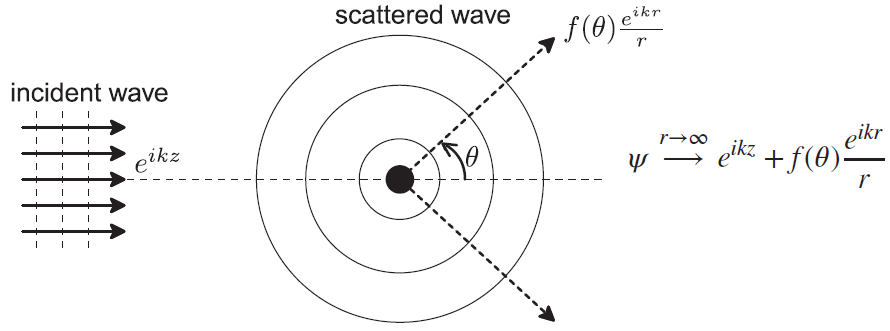

This problem still obeys the **Schrodinger equation**. The method we use in this Assignment works more easily if we rewrite the Schrodinger equation as
$$
u''_l + qu = 0,
$$
with $u_l = r R_l(E,r)$ is a modified version of the hydrogen radial wave functions from Assignment 10 and $q = 2 \left( E-V- \frac{l(l+1)\hbar^2}{2mr^2} \right)$.

In a scattering problem, the incoming state is a **plane wave** $\psi = e^{ikz}$, and the outgoing state is a **spherical wave** $\psi = f(\theta) e^{ikr}/r$. The **scattering amplitude** $f(\theta)$ is the piece we're interested in determining.

The scattering amplitude $f(\theta)$ determines how strongly the wave scatters at each angle $\theta$ from the initial direction. It's given by (the rather lengthy)
$$
f(\theta)= \frac{1}{k} \sum_{l=0}^{\infty} 
    (2l+1) e^{i\delta_l} \sin \delta_l \; P_l(\cos\theta)
$$

where the **phase shift** $\delta_l$ satisfies
$$
\tan \delta_l =     \frac{(\gamma a -1) j_l(ka) - k a \, j_l'(ka)} {(\gamma a -1) n_l(ka) - k a \, n_l'(ka)},
$$
where...
* $\gamma = \frac{u'_l(k,a)}{u_l(k,a)}$ 
* $a$ is the effective range of the potential energy. We usually get to pick the value of $a$, and we'll determine a reasonable value below.
* $j_l$ is the $l$th [**spherical Bessel function**](https://mathworld.wolfram.com/SphericalBesselFunctionoftheFirstKind.html), a two-dimensional analog of sine and cosine. Python will calcualte these for us.

Computing $f(\theta)$ and $\delta_l$ requires knowing the wave function $u_l$ and its derivative $u_l'$ far away from the target (the **asymptotic region**), which we'll compute numerically. 

Once we have the scattering amplitude $f(\theta)$, we can compute the **scattering cross section** $\sigma(\theta) = |f(\theta)|^2$, which tells us the number of scattered particles we expect to find at angle $\theta$.

## Step 1: Numerov's Method
##### CODE DISCUSSION 
Instead of the Shooting Method to solve the Schrodinger equation for our scattered state ($u''+q(x)u = 0$), we'll make use of **Numerov's method**, which takes advantage of the fact that there is no $u'$ in the Schrodinger equation and works as follows:

We start at a point $x$ off to the left, where we set $u=0$. (Our incoming state is a wave, so this is just a matter of choosing where the wave starts.) Next, we choose a value for $h$, the **grid size** that we'll use in marching forward along the $x$ direction. Each value of $x$ that we step to is labeled as $x_i = ih$; each value of $u$ and $u'$ at those grid points is labled as $u_i$ and $u'_i$.

If we define $c=\frac{h^2}{12}$, we can apply a Taylor series to the Schrodinger equation to give us **3-term recursions** for $u$ and $u'$ at each point $x_i$ along the grid:
$$ \begin{eqnarray}
u_{i+1} & = & \left \{ 2 \left(1 - 5c\, q_i \right) u_i - \left(1 + c\, q_{i-1} \right) u_{i-1} \right\}/ \left( 1+ c\, q_{i+1} \right ) + O(h^6) \\
u_i' & = & \frac{1}{2h}     \left \{ \left( 1+ 2c\, q_{i+1}\right ) u_{i+1} -             \left( 1+ 2c\, q_{i-1}\right ) u_{i-1} \right \} + O(h^4)
\end{eqnarray}
$$

You can see [a](https://en.wikipedia.org/wiki/Numerov%27s_method) [few](http://physics.ucsc.edu/~peter/242/numerov.pdf) [derivations](https://aip.scitation.org/doi/pdf/10.1063/1.168593) for these recursions if you like, but we'll dive into using them. The $O(h^4)$ and $O(h^6)$ indicate **higher-order terms** that are small enough that we can ignore them.

We start with $u_0 = u(0)=0$ and $u_1 = u(h) = 1$. (Remember: The shape of the wave funciton is more important than its actual values. We can then use the recursions to obtain $u_2 = u(2h)$, $u_3 = u(3h)$, up to a final $u(nh)$ on the other side of the target.

We call $\delta_l$ a phase shift. What is it shifting?

[Add your answer here.]

Below we implement the Numerov method in a function that takes in the function $q(x)$, an array for the values of $u$, the number of points $n$, the starting point $x$, and the grid size $h$.

* Where and how does this code cell carry out the recursion for $u$?

[Add your answer here.]

* What are the ``nodes`` that the function is counting? How does it determine where a node exists?

[Add your answer here.]

In [7]:
def numerov(q, u, n, x, h):     # Numerov integrator for u''+q(x)u=0
    nodes, c = 0, h*h/12.       # given u = [u_0,u_1], return u = [u_0,u_1,...,u_{n+1}]
    f0, f1 = 0., q(x+h)
    for i in range(n):
        x += h
        f2 = q(x+h)             # Numerov method below
        u.append((2*(1-5*c*f1)*u[i+1] - (1+c*f0)*u[i])/(1+c*f2))  
        f0, f1 = f1, f2
        if (u[-1]*u[-2] < 0.0): nodes += 1
    return u, nodes

Run the code cell above.

Next we import the spherical Bessel functions. This part's a bith lengthy since SciPy changed its name for these functions... You don't need to do anything here except run the code cell below and note that this is the type of thing you have to watch out for when using someone else's library...

In [8]:
# needed libraries
import scipy
if scipy.__version__[0] < '1':  # sph. Bessel func changed after ver 1.0.0
    from scipy.special import sph_jn, sph_yn, lpn
else:
    from scipy.special import spherical_jn as sph_jn, spherical_yn as sph_yn, lpn
import matplotlib.pyplot as plt, numpy as np
%matplotlib notebook

## Step 2
##### CODE DISCUSSION 
For scattering studies, we often use the **[Yukawa potential energy](https://en.wikipedia.org/wiki/Yukawa_potential)**, which models a [screened charge](https://en.wikipedia.org/wiki/Electric-field_screening) as follows:

$$
V = -\frac{Z}{r} \exp(-r/s),
$$

where $Z$ is the strength of the potential energy and $s$ is the **screening range** of the potential energy. (Our range $a$ from earlier needs to be 3-4 times the size of $s$.)

The code cell below defines the Yukawa potential energy. Add code to this cell to create a graph of $V$ for $Z = 2$ and several different values of $s$. How does the shape of the Yuakawa potential energy change as $s$ increases? What equation does $V(r)$ approach as $s \rightarrow \infty$, and why is this limit important?

[Add your answers here.]

In [9]:
def V(r, Z=2.0, s=1.0):                       # Yukawa potential
    return -Z*np.exp(-r/s)/r

# Add code for graph here. You can invoke different values of s using
# V(r, Z=2., s=??), replacing ?? with the value you want.

The code cell below sets up $q$ and defines a function to compute the wave function using Numerov's method. Run this cell.

In [10]:
def q(r):                       # Sch eqn in Numerov form
    return 2*(E - V(r)) - L*(L+1)/(r*r)

def wf(M, xm):                  # find w.f. and deriv at xm
    c = (h*h)/6.
    wfup, nup = numerov(q, [0,.1], M, 0., h)    # 1 step past xm
    dup = ((1+c*q(xm+h))*wfup[-1] - (1+c*q(xm-h))*wfup[-3])/(h+h)
    return wfup, dup/wfup[-2]

## Step 3
##### CODE DISCUSSION 
Let's get on with it! The code cell below calculates the wave function for scattering off a Yukawa potential and uses this information to calcualte the phase shifts $\delta_l$ and each term in the summation of the scattering amplitude $f(\theta)$. Notice that it defines the potential range $a$, which needs to be at least 3-4 times as large as $s$ that you defined above.

* Where and how is the wave function determined?

[Add your answer here.]

* Where and how are the phase shifts calcualted?

[Add your answer here.]

* Where and how are the pieces of the scattering amplitude calculated? What would you have to do with these pieces to get the full $f(\theta)$?

[Add your answer here.]

* Add code to calculate the scattering cross section $\sigma(\theta)$ for each value of $\theta$ used in the code cell below. You might like to calcualte $f(\theta)$ first.

Run the code cell once you're finished.

In [11]:
# Computation

a, M, uL = 10., 200, []                 # matching point, steps
h, Lmax, E =a/M, 15, 2.                 # step size, max L, energy
k, ps = np.sqrt(2*E), np.zeros(Lmax+1)  # wave vector, phase shift
if scipy.__version__[0] < '1':
    jl, dj = sph_jn(Lmax, k*a)          # (j_l, j_l') tuple     
    nl, dn = sph_yn(Lmax, k*a)          # (n_l, n_l')
else:
    Lrange = range(Lmax + 1)
    jl, dj = sph_jn(Lrange, k*a, False), sph_jn(Lrange, k*a, True) # (j_l, j_l')
    nl, dn = sph_yn(Lrange, k*a, False), sph_yn(Lrange, k*a, True) # (n_l, n_l')

for L in range(Lmax+1):
    u, g = wf(M, a)                     # g= u'/u
    uL.append(u)
    x = np.arctan(((g*a-1)*jl[L] - k*a*dj[L])/    # phase shift 
                  ((g*a-1)*nl[L] - k*a*dn[L]))
    while (x < 0.0): x += np.pi         # handle jumps by pi 
    ps[L] = x
theta, sigma = np.linspace(0., np.pi, 100), []
cos, La = np.cos(theta), np.arange(1,2*Lmax+2,2)
for x in cos:                               # calc cross section
    pl = lpn(Lmax, x)[0]                    # lth Legendre polynomial 
    fl = La*np.exp(1j*ps)*np.sin(ps)*pl     # lth scattering amplitude piece
    sigma.append(??)

## Step 4
##### CODE 
The code below plots the the wave function (scaled based on its maximum value) for several different values of $l$. Run this code cell and describe how the results differ for different $l$. Try other values of $l$ to see if your description holds.

<IPython.core.display.Javascript object>


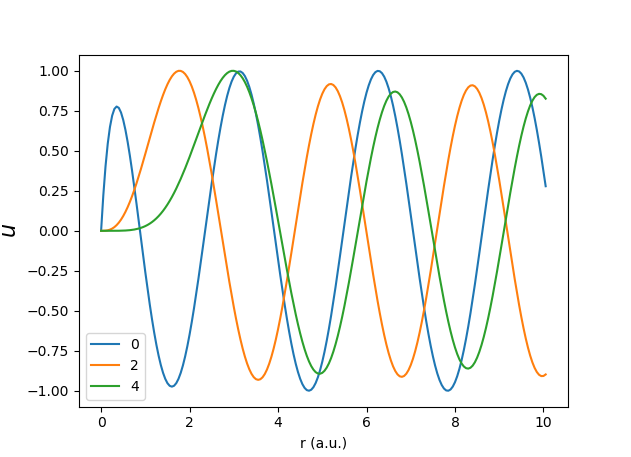

In [12]:
# results: wave function
plt.figure()                                # plot scaled w.f.
uL = np.array(uL)
for L in range(0, 5, 2):
    plt.plot(h*np.arange(len(uL[L])), uL[L]/max(abs(uL[L])),label=L)
plt.legend()
plt.xlabel('r (a.u.)'), plt.ylabel('$u$', fontsize=16);

## Step 5
##### CODE DISCUSSION 
The code below graphs the phase shift versus angular momentum number $l$. Run the cell and describe the graph.

[Add your answer here.]

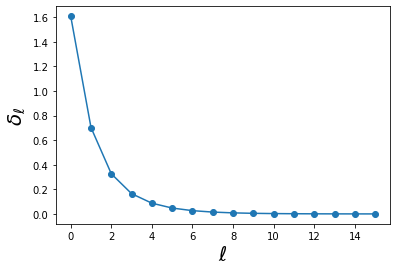

In [7]:
# Results: phase shift: positive  δl ; larger  δl  for smaller  ℓ 
plt.figure()                                # plot phase shift vs L
plt.plot(range(Lmax+1), ps, '-o')
plt.xlabel('$\ell$', fontsize=20), plt.ylabel(r'$\delta_\ell$', fontsize=20);

## Step 6
##### CODE DISCUSSION 
Now for the big finale: The code cell below graphs the scattering cross section $\sigma$ versus $\theta$. Run the code cell and describe the graph. What does this tell you about the likelihood of the direction the electron scatters in?

[Add your answer here.]

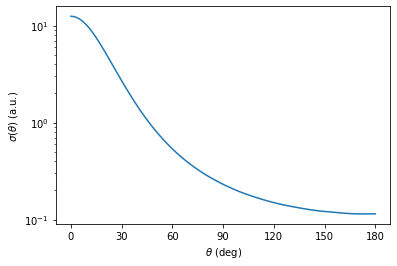

In [8]:
# Results: cross section
plt.figure()        
plt.plot(theta*180/np.pi, sigma)            # plot cross sections   
xtck = [0, 30, 60, 90, 120, 150, 180]
plt.xticks(xtck, [repr(i) for i in xtck])   # custom ticks 
plt.xlabel(r'$\theta$ (deg)'), plt.ylabel(r'$\sigma(\theta)$ (a.u.)'), plt.semilogy();

## Step 7
##### CODE DISCUSSION 

This notebook represents one single scattering experiment. Repeat it for several different values of $s$, the Yukawa potential energy's range. How is the scattering cross section $\sigma$ affected if you increase or decrease $s$? How could we use these experiments to understand the size and structure of an atom?

[Add your answer here.]

# EXTRA CREDIT

## Step 8

Compare your results for $\sigma(\theta)$ with thsoe for an electron encountering zero potential energy (i.e., scattering with no target).

## Step 9

Compare your results for $\sigma(\theta)$ with those for [classical scattering](https://www.matmor.unam.mx/~robert/sem/20090403_Colosi.pdf).